In [1]:
#import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
#call the data
df=pd.read_csv('C:/Users/AIRYOLK NIGERIA LTD/Downloads/archive/raw_data.csv')
df2=pd.read_csv('C:/Users/AIRYOLK NIGERIA LTD/Downloads/archive/transformed_data.csv')
df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,8.994048296,5.442417711,4.34185547,16.514381,7.549490737
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,8.996528148,5.442417711,4.34185547,16.514381,7.549490737
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,8.999495876,5.442417711,4.34185547,16.514381,7.549490737
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,9.000853147,5.442417711,4.34185547,16.514381,7.549490737


In [3]:
## data preparation/wrangling
print (df.head())

  iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!    

In [4]:
print (df2.head()) #how many samples of each country are present in the dataset

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [5]:
df2['COUNTRY'].value_counts() #we do not have equal number of samples for country

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [6]:
#looking at the mode value (highest frequency), the mode value sha;; be used to divide the sum of all sampmes relating to the human development index, GDP per capita and population.
df2['COUNTRY'].value_counts().mode()

0    294
dtype: int64

In [7]:
#create a new dataset by combining necessary coulmns from both dataset
code=df2['CODE'].unique().tolist()
country=df2['COUNTRY'].unique().tolist()
hdi=[]
tc=[]
td=[]
sti=[]
population=df2['POP'].unique().tolist()
gdp=[]

for i in country:
    hdi.append((df2.loc[df2["COUNTRY"]==i, "HDI"]).sum()/294)
    tc.append((df.loc[df['location']==i,'total_cases']).sum())
    td.append((df.loc[df['location']==i,'total_deaths']).sum())
    sti.append((df2.loc[df2['COUNTRY']==i,'STI']).sum()/294)
    population.append((df.loc[df['location']==i, "population"]).sum()/294)
    
aggregated_data=pd.DataFrame(list(zip(code, country, hdi,tc,td,sti,population)),
                             columns=["Country Code", "Country", "HDI", "Total Cases", 
                                      "Totl Deaths", "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country       HDI  Total Cases  Totl Deaths  \
0          AFG  Afghanistan  0.498000    5126433.0     165875.0   
1          ALB      Albania  0.600765    1071951.0      31056.0   
2          DZA      Algeria  0.754000    4893999.0     206429.0   
3          AND      Andorra  0.659551     223576.0       9850.0   
4          AGO       Angola  0.418952     304005.0      11820.0   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


In [8]:
# create a subsample from the dataset; sorting according to the total covid cases

df=aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(df.head())

    Country Code        Country      HDI  Total Cases  Totl Deaths  \
200          USA  United States  0.92400  746014098.0   26477574.0   
27           BRA         Brazil  0.75900  425704517.0   14340567.0   
90           IND          India  0.64000  407771615.0    7247327.0   
157          RUS         Russia  0.81600  132888951.0    2131571.0   
150          PER           Peru  0.59949   74882695.0    3020038.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.311165  


In [9]:
#top 10 countries with highest covid cases
df=df.head(10)
print(df)

    Country Code         Country       HDI  Total Cases  Totl Deaths  \
200          USA   United States  0.924000  746014098.0   26477574.0   
27           BRA          Brazil  0.759000  425704517.0   14340567.0   
90           IND           India  0.640000  407771615.0    7247327.0   
157          RUS          Russia  0.816000  132888951.0    2131571.0   
150          PER            Peru  0.599490   74882695.0    3020038.0   
125          MEX          Mexico  0.774000   74347548.0    7295850.0   
178          ESP           Spain  0.887969   73717676.0    5510624.0   
175          ZAF    South Africa  0.608653   63027659.0    1357682.0   
42           COL        Colombia  0.581847   60543682.0    1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0    7249573.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.

In [10]:
#adding GDP PER CAPITA (collected manually as the one provided in the dataset isn't correct) before and after covid-19 to this dataset
df["GDP Before Covid"]=[65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]

df["GDP During Covid"]=[63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
print(df)


    Country Code         Country       HDI  Total Cases  Totl Deaths  \
200          USA   United States  0.924000  746014098.0   26477574.0   
27           BRA          Brazil  0.759000  425704517.0   14340567.0   
90           IND           India  0.640000  407771615.0    7247327.0   
157          RUS          Russia  0.816000  132888951.0    2131571.0   
150          PER            Peru  0.599490   74882695.0    3020038.0   
125          MEX          Mexico  0.774000   74347548.0    7295850.0   
178          ESP           Spain  0.887969   73717676.0    5510624.0   
175          ZAF    South Africa  0.608653   63027659.0    1357682.0   
42           COL        Colombia  0.581847   60543682.0    1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0    7249573.0   

     Stringency Index  Population  GDP Before Covid  GDP During Covid  
200          3.350949   19.617637          65279.53          63543.58  
27           3.136028   19.174732           8897.49           6

## We shall now carry out expository data analysis on the organised dataset

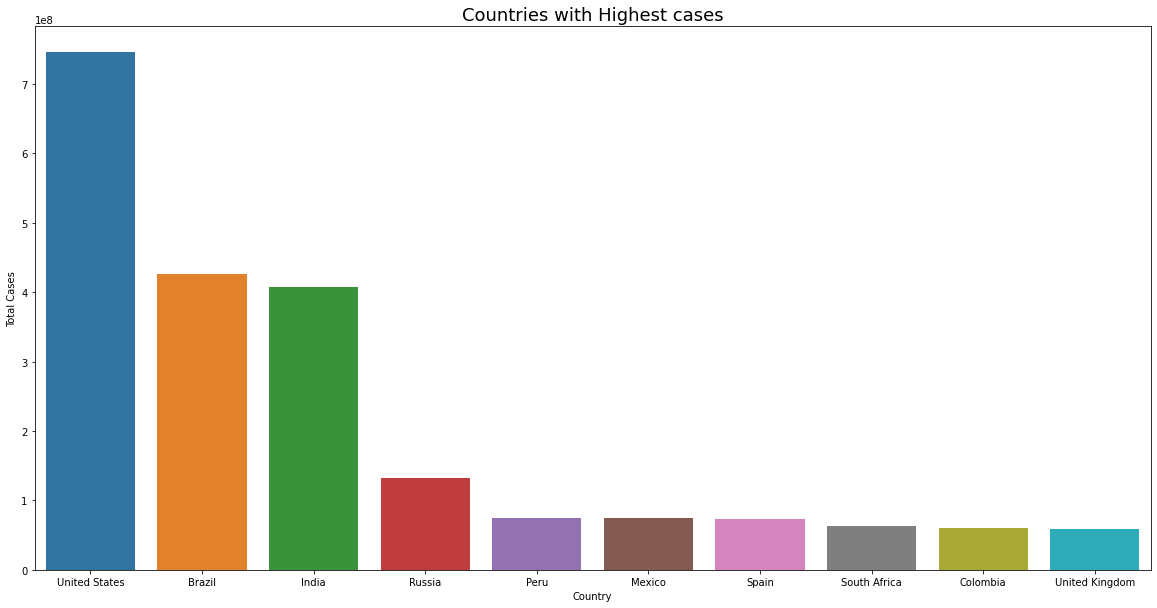

In [11]:
#analysing the spread of covid-19
plt.figure(figsize=(20,10))
sns.barplot(x='Country',y='Total Cases',data=df)
plt.title('Countries with Highest cases', size=18)
plt.color=(['black','red','purple','blue','pink','yellow','gray','orange','turquoise','brown'])
plt.show()

## As seen in the chart above, USA has the highest number of covid-19 cases, compared to Brazil and India in the second and third places. Other countries fall below 150 million cases.

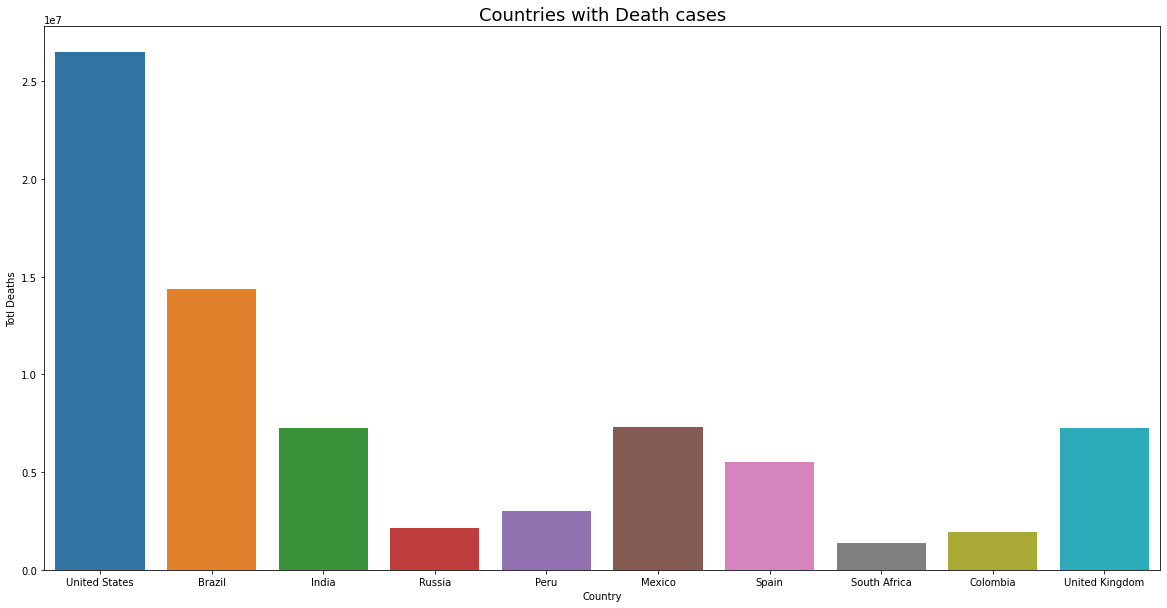

In [12]:
#analysing the number of deaths from covid-19
plt.figure(figsize=(20,10))
sns.barplot(x='Country',y='Totl Deaths',data=df)
plt.title('Countries with Death cases', size=18)
plt.color=(['black','red','purple','blue','pink','yellow','gray','orange','turquoise','brown'])
plt.show()

## Similarly, USA has the highest number of deaths, with Brazil in the second place. 

<Figure size 1440x720 with 0 Axes>

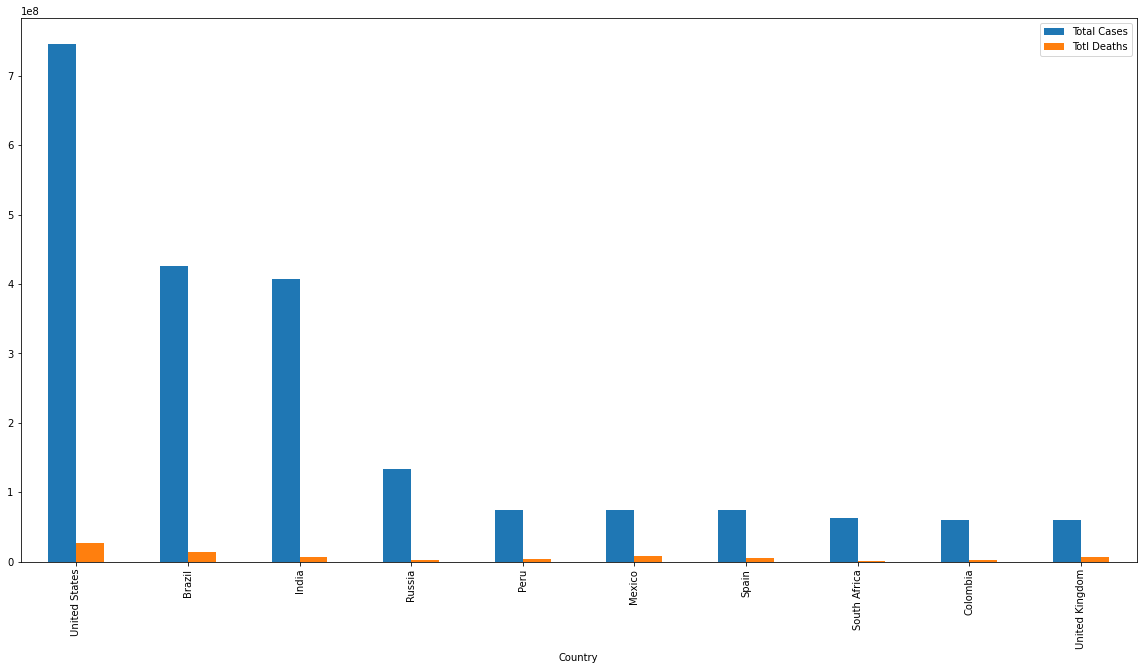

In [13]:
#comparing the total number of deaths to the total cases in these countries
plt.figure(figsize=(20,10))
df.plot(x='Country',y=['Total Cases','Totl Deaths'],kind='bar',figsize=(20,10))
plt.color=(['black','red','purple','blue','pink','yellow','gray','orange','turquoise','brown'])
plt.show()

## The total number of deaths is relatively low compared to the total number of cases for all countries.


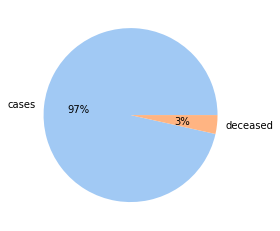

<Figure size 1080x576 with 0 Axes>

In [14]:
#Now let’s have a look at the percentage of total deaths and total cases among all the countries with the highest number of covid-19 cases
cases = df["Total Cases"].sum()
deceased = df["Totl Deaths"].sum()
data=[cases,deceased]
labels=['cases','deceased']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.figure(figsize=(15,8))
plt.show()

In [15]:
#Calculating the death rate of Covid-19 cases
death_rate=(df["Totl Deaths"].sum()/df["Total Cases"].sum())*100
print('Death Rate=',death_rate)

Death Rate= 3.6144212045653767


## The stringency index is composed of a measure of reponse indicators which include school closures, workplace closures and travel bans. It shows how strictly countries followed these measures to control the spread of covid-19

In [25]:
df_sorted= df.sort_values('Stringency Index')

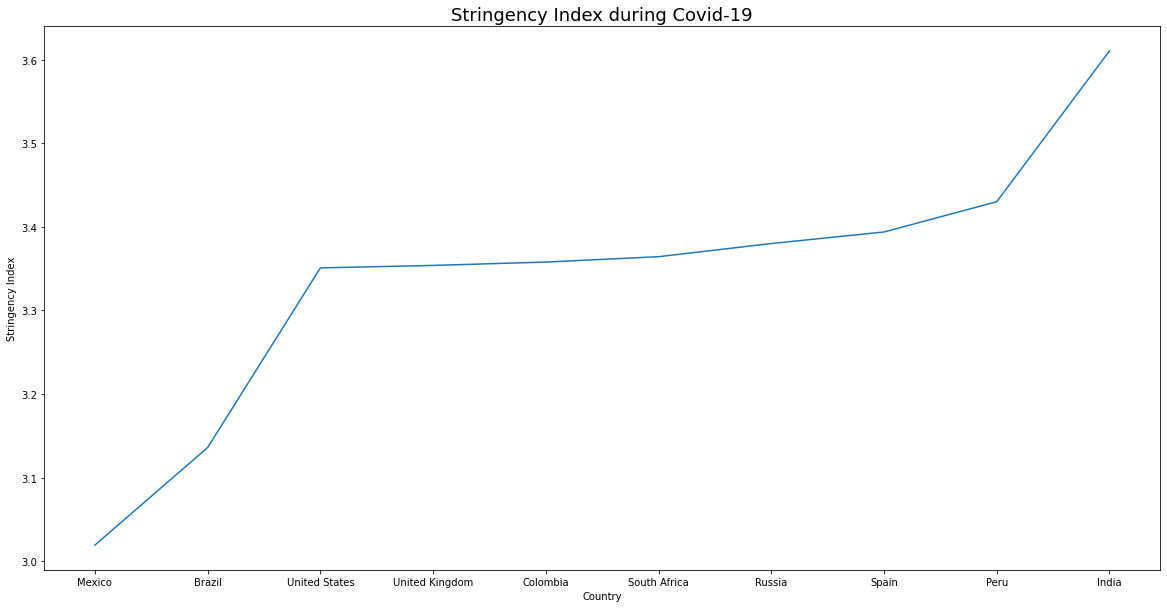

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Country',y='Stringency Index',data=df_sorted)
plt.title('Stringency Index during Covid-19', size=18)
plt.show()

## The plot shows that India performed the best in the stringency index during the outbreak of Covid-19.

## We shall now move to analyzing the impacts of Covid-19 on the economy of these countries, we shall look at the GDP per capital before and during the covid-19 outbreak

In [27]:
#Analyzing GPD Per capita before Covid-19
df_sorted= df.sort_values('GDP Before Covid')

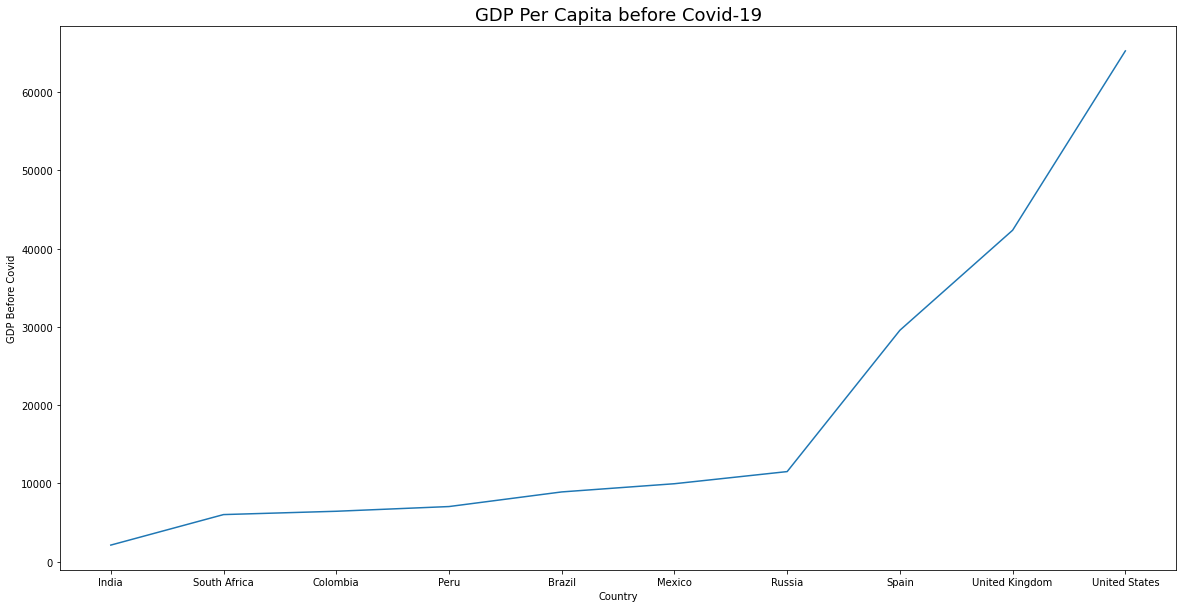

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Country',y='GDP Before Covid',data=df_sorted)
plt.title('GDP Per Capita before Covid-19', size=18)
plt.show()

In [29]:
#Analyzing GPD Per capita during Covid-19
df_sorted= df.sort_values('GDP During Covid')

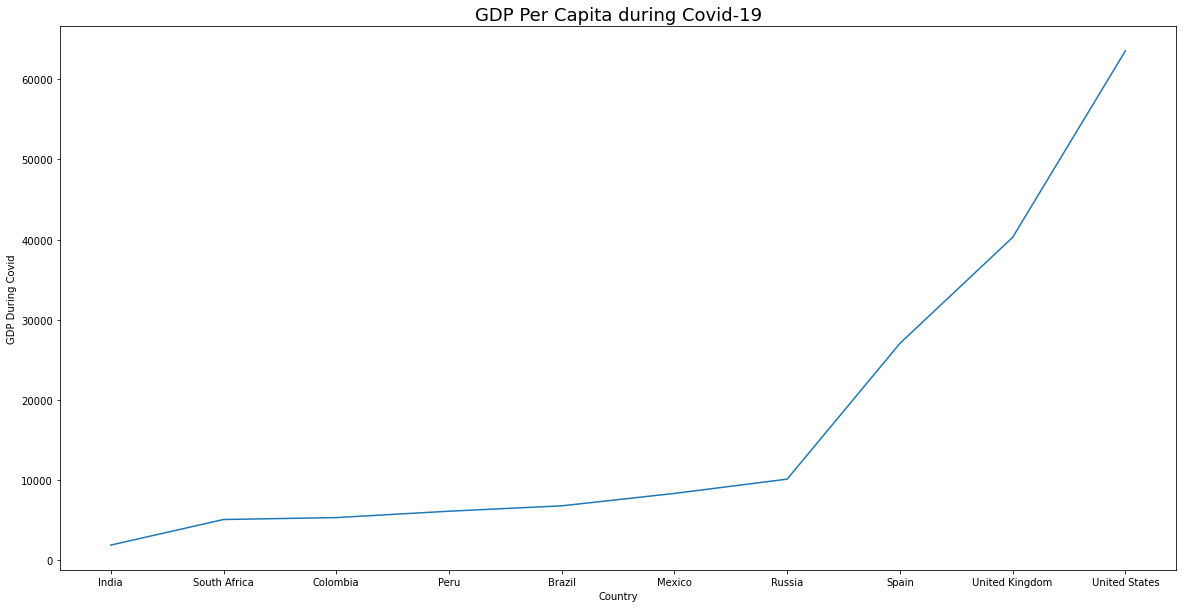

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Country',y='GDP During Covid',data=df_sorted)
plt.title('GDP Per Capita during Covid-19', size=18)
plt.show()

## Now let's compare the GPD per capital before and during  covid to see the impact on the economy

<Figure size 1440x720 with 0 Axes>

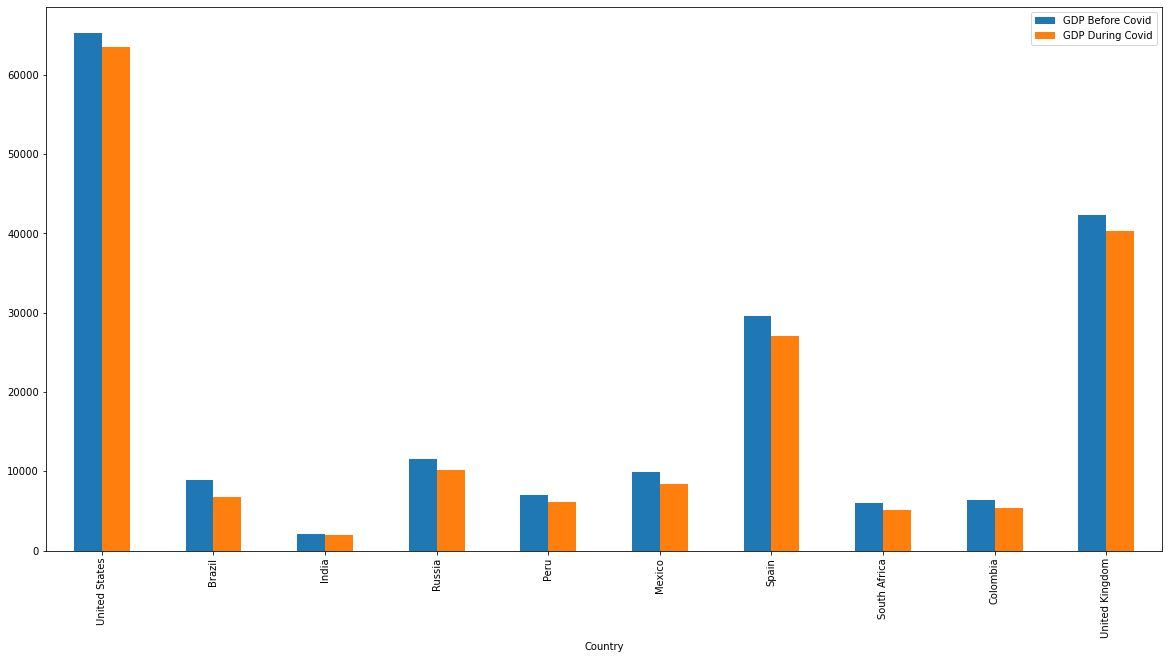

In [34]:
#comparing the GPD Per Capita before and during covid-19 in these countries
plt.figure(figsize=(20,10))
df.plot(x='Country',y=['GDP Before Covid','GDP During Covid'],kind='bar',figsize=(20,10))
plt.show()

## From the chart above, it can be seen that there is a drop in the GDP per capita in all countries.

## Conclusion
In general, United States and Brazil had the highest number of Covid cases but also had a relatively low number of deaths as a result of Covid-19.

The analysis also shows that India was the most responsive to the measures put in place to reduce the spread of Covid-19. In terms of the economical impacts, there was a decrease in the GPD per Capita during the Covid-19, 